# Problem 1

In [2]:
# libraries needed
import numpy as np
import matplotlib.pyplot as plt
import string

['the quick brown fox jumps over a lazy dog', 'waltz, bad nymph, for quick jigs vex', 'glib jocks quiz nymph to vex dwarf', 'sphinx of black quartz, judge my vow', 'how vexingly quick daft zebras jump', 'the five boxing wizards jump quickly', 'jackdaws love my big sphinx of quartz', 'pack my box with five dozen liquor jugs', 'waltz, bad nymph, for quick jigs vex', 'quick zephyrs blow, vexing daft Jim', 'sphinx of black quartz, judge my vow', 'two driven jocks help fax my big quiz', 'five quacking zephyrs jolt my wax bed', 'the five boxing wizards jump quickly', 'pack my box with five dozen liquor jugs', 'the quick brown fox jumps over the lazy dog', 'jinxed wizards pluck ivy from the big quilt', 'crazy fredrick bought many very exquisite opal jewels', 'we promptly judged antique ivory buckles for the next prize', 'a mad boxer shot a quick, gloved jab to the jaw of his dizzy opponent', 'jaded zombies acted quaintly but kept driving their oxen forward', 'the job requires extra pluck and 

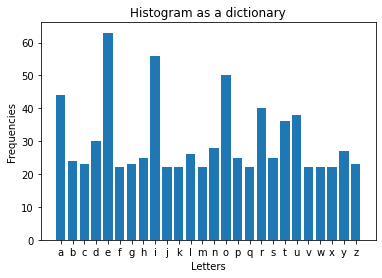

Histogram as array:   [44. 24. 23. 30. 63. 22. 23. 25. 56. 22. 22. 26. 22. 28. 50. 25. 22. 40.
 25. 36. 38. 22. 22. 22. 27. 23.]


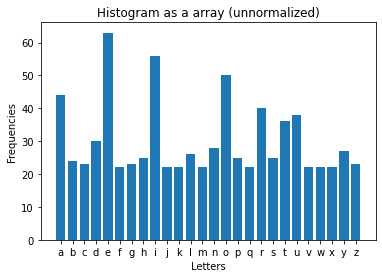

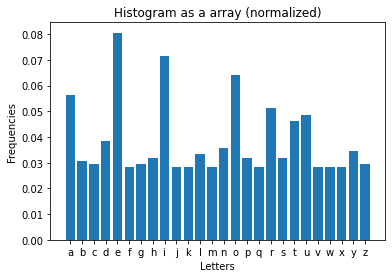

In [3]:
#Sentences to analyze
text = ["the quick brown fox jumps over a lazy dog","waltz, bad nymph, for quick jigs vex","glib jocks quiz nymph to vex dwarf","sphinx of black quartz, judge my vow","how vexingly quick daft zebras jump","the five boxing wizards jump quickly","jackdaws love my big sphinx of quartz","pack my box with five dozen liquor jugs","waltz, bad nymph, for quick jigs vex","quick zephyrs blow, vexing daft Jim","sphinx of black quartz, judge my vow","two driven jocks help fax my big quiz","five quacking zephyrs jolt my wax bed","the five boxing wizards jump quickly","pack my box with five dozen liquor jugs","the quick brown fox jumps over the lazy dog","jinxed wizards pluck ivy from the big quilt", "crazy fredrick bought many very exquisite opal jewels", "we promptly judged antique ivory buckles for the next prize", "a mad boxer shot a quick, gloved jab to the jaw of his dizzy opponent", "jaded zombies acted quaintly but kept driving their oxen forward", "the job requires extra pluck and zeal from every young wage earner"]

print(text)

# Histogram as dictionary
hist_1 = {}
#loop over a, b, ..., z and count how many times they repeat
for letter in range(ord('a'), ord('z') + 1):
    hist_1[chr(letter)] = ''.join(text).count(chr(letter))  
  
print("Histogram as a dictionary: ",hist_1)    
plt.bar(hist_1.keys(), hist_1.values())
plt.title('Histogram as a dictionary')
plt.xlabel('Letters')
plt.ylabel('Frequencies')
plt.show()

#Histogram as numpy array
#Use the dictionary already created to create a numpy array
items = [(k, v) for k, v in hist_1.items()] #get dictionary items

hist2_vals = np.zeros(26)

for i in range(26):
    hist2_vals[i] = items[i][1]

print("Histogram as array:  ",hist2_vals)
plt.bar(list(map(chr, range(ord('a'), ord('z')+1))),hist2_vals)
plt.title('Histogram as a array (unnormalized)')
plt.xlabel('Letters')
plt.ylabel('Frequencies')
plt.show()

#to normalize histogram sum all elements in array and divide array by sum
sum = 0
for i in range(26):
    sum += hist2_vals[i]
    
norm_histo = (1/sum)*hist2_vals

plt.bar(list(map(chr, range(ord('a'), ord('z')+1))), norm_histo)
plt.title('Histogram as a array (normalized)')
plt.xlabel('Letters')
plt.ylabel('Frequencies')
plt.show()
    

# Problem 2

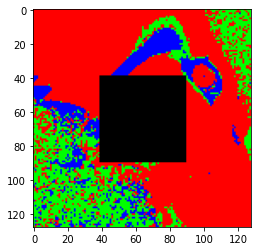

In [40]:
import cv2
img = cv2.imread('test.png')

#plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

#Points to find euclidean distance
points = np.array([[255,0,0],[0,255,0],[0,0,255]])

#dimensions of img for loops
#w:image-width and h:image-height
(h, w) = img.shape[:2] 

#array to save distances
dist = np.zeros(3)

#loop over all pixels
for i in range(h):
    for j in range(w):
        dist[0] = np.linalg.norm(img[i,j]-points[0,:])
        dist[1] = np.linalg.norm(img[i,j]-points[1,:])
        dist[2] = np.linalg.norm(img[i,j]-points[2,:])
        min_dist = min(dist)
        if min_dist == dist[0]:
            img[i,j] = points[0,:]
        if min_dist == dist[1]:
            img[i,j] = points[1,:]
        if min_dist == dist[2]:
            img[i,j] = points[2,:]          

#plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
isWritten = cv2.imwrite('output1.png', img)  

#define square
start_point = (w//2 - 25, h//2 + 25)
end_point = (w//2 + 25, h//2 - 25)

cv2.rectangle(img, start_point, end_point, (0,0,0), -1)
isWritten = cv2.imwrite('output2.png', img) 
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Problem 3

In [5]:
#problem statement
pro = open("problem.txt","r")
pro_sta = pro.read()
print(pro_sta)

# data in format [soft tacos, burritos]
m = np.array([[3,3],[4,2]])

print("# of soft tacos: ", m[:,0])
print("# of burritos: ", m[:,1])

#Total bill vector
b = np.array([11.25,10.00])

print("Total bill",b)

#solution
inv_m = np.linalg.inv(m)
sol = inv_m.dot(b)

print("price of soft tacos: $",sol[0])
print("price of burritos: $", sol[1])



Problem statement:
You and a friend go to buy tacos. You get three soft tacos and three burritos and your total bill is $11.25. Your friend's bill is $10.00 for four soft tacos and two burritos. How much do soft tacos cost? How much do burritos cost?

# of soft tacos:  [3 4]
# of burritos:  [3 2]
Total bill [11.25 10.  ]
price of soft tacos: $ 1.2500000000000002
price of burritos: $ 2.4999999999999996
